In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_excel("/content/Dataset - 4.xlsx")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
# Part 1: Sensor Data Exploration

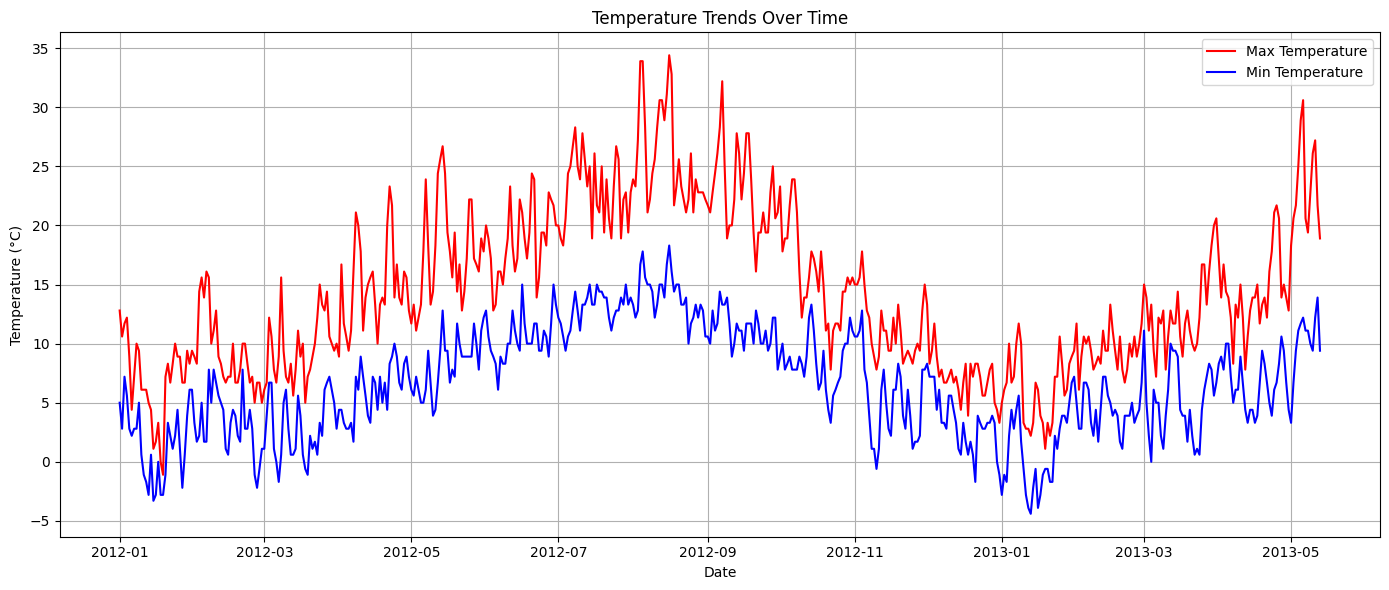

In [11]:
# 1. Visualise temperature trends:
# • Plot temp_max and temp_min over time.
# • Identify seasonal or periodic temperature patterns.

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temperature', color='red')
plt.plot(df['date'], df['temp_min'], label='Min Temperature', color='blue')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

* There's a consistent rise in both max and min temperatures around mid-year (May to August), followed by a decline toward end/beginning of each year (November to February). This suggests a typical summer-winter seasonal cycle.

* Highest temperatures are observed between June and August, indicating summer months.

* Lowest temperatures occur between December and February, marking the winter season.

* This pattern repeats annually, demonstrating periodic behavior typical of temperate climates with distinct seasons.

Average Wind Speed (Daily): 3.40501002004008
Average Wind Speed (Weekly): 3.4389432485322895
Average Wind Speed (Monthly): 3.4077244042136408




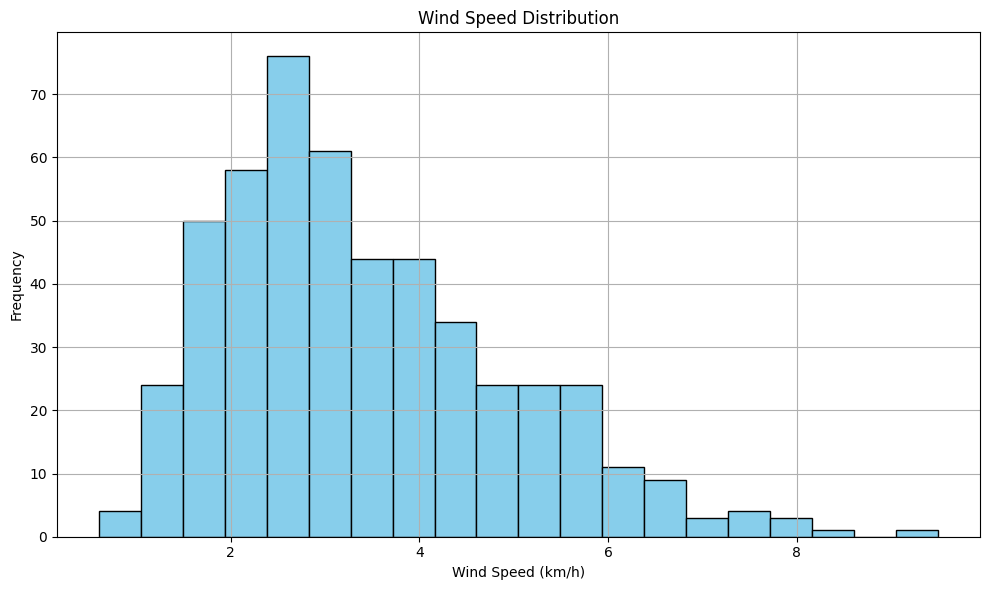



Wind Speed Variance (Daily): 2.2591515561242987
Wind Speed Variance (Weekly): 0.6032667815984841
Wind Speed Variance (Monthly): 0.19747657901177593


In [12]:
# 2. Analyze wind behavior:
# • Compute daily, weekly, and monthly average wind speeds.
# • Plot wind speed distribution and comment on variance.

df.set_index('date', inplace=True)

wind_daily = df['wind']
wind_weekly = df['wind'].resample('W').mean()
wind_monthly = df['wind'].resample('ME').mean()

print("Average Wind Speed (Daily):", wind_daily.mean())
print("Average Wind Speed (Weekly):", wind_weekly.mean())
print("Average Wind Speed (Monthly):", wind_monthly.mean())
print("\n")

plt.figure(figsize=(10, 6))
plt.hist(df['wind'], bins=20, color='skyblue', edgecolor='black')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n")
print("Wind Speed Variance (Daily):", wind_daily.var())
print("Wind Speed Variance (Weekly):", wind_weekly.var())
print("Wind Speed Variance (Monthly):", wind_monthly.var())

* Daily variance (2.26) is high, showing significant short-term wind speed fluctuations.

* Weekly (0.60) and monthly (0.20) variances are much lower, indicating wind stabilizes over time.

* Histogram shows a right-skewed distribution, with most wind speeds between 2–4 km/h.

In [13]:
# Part 2: Precipitation and Weather Conditions

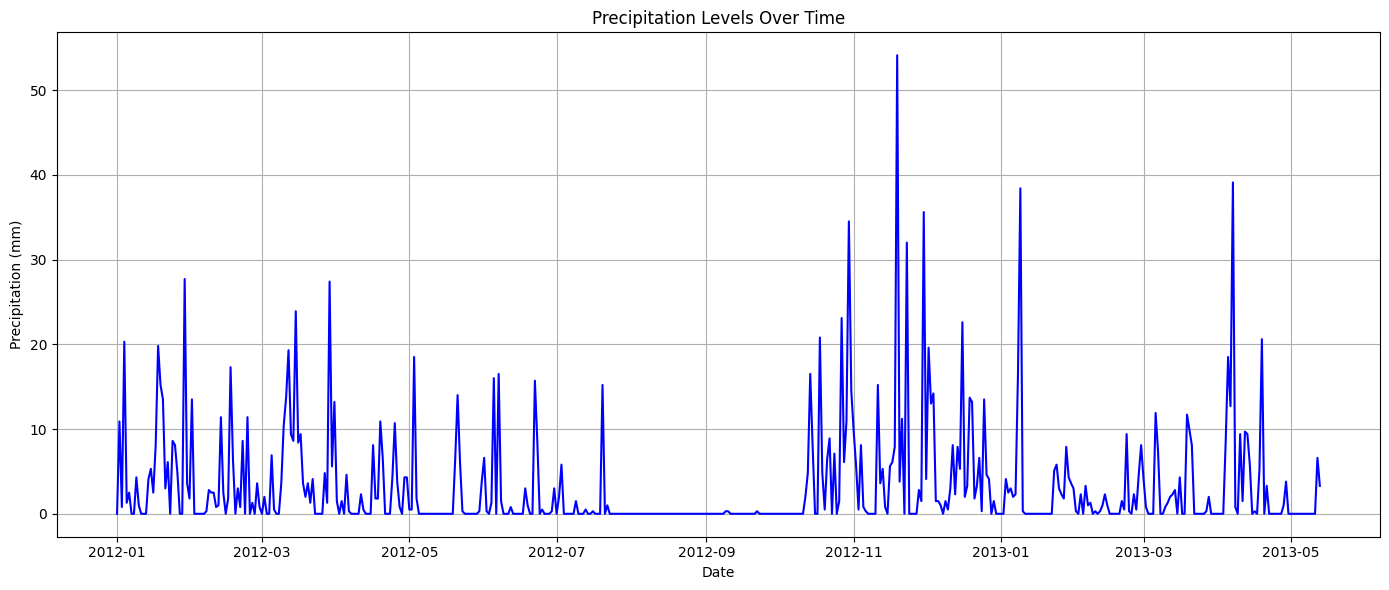



Days with Extreme Rainfall (>20mm):
            precipitation weather
date                             
2012-10-30           34.5    rain
2012-11-19           54.1    rain
2012-11-23           32.0    rain
2012-11-30           35.6    rain
2013-01-09           38.4    rain
2013-04-07           39.1    rain


Average Precipitation per Weather Type:
weather
snow       9.047826
rain       5.237218
drizzle    0.000000
fog        0.000000
sun        0.000000
Name: precipitation, dtype: float64


In [14]:
# 1. Plot precipitation levels over time.
# ●	Identify days with extreme rainfall.
# ●	Correlate with weather column to see how qualitative labels match quantitative data.

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['precipitation'], color='blue')
plt.title('Precipitation Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# days with extreme rainfall
extreme_rain = df[df['precipitation'] > 30]
print("\n")
print("Days with Extreme Rainfall (>20mm):")
print(extreme_rain[['precipitation', 'weather']])

weather_precip = df.groupby('weather')['precipitation'].mean().sort_values(ascending=False)
print("\n")
print("Average Precipitation per Weather Type:")
print(weather_precip)

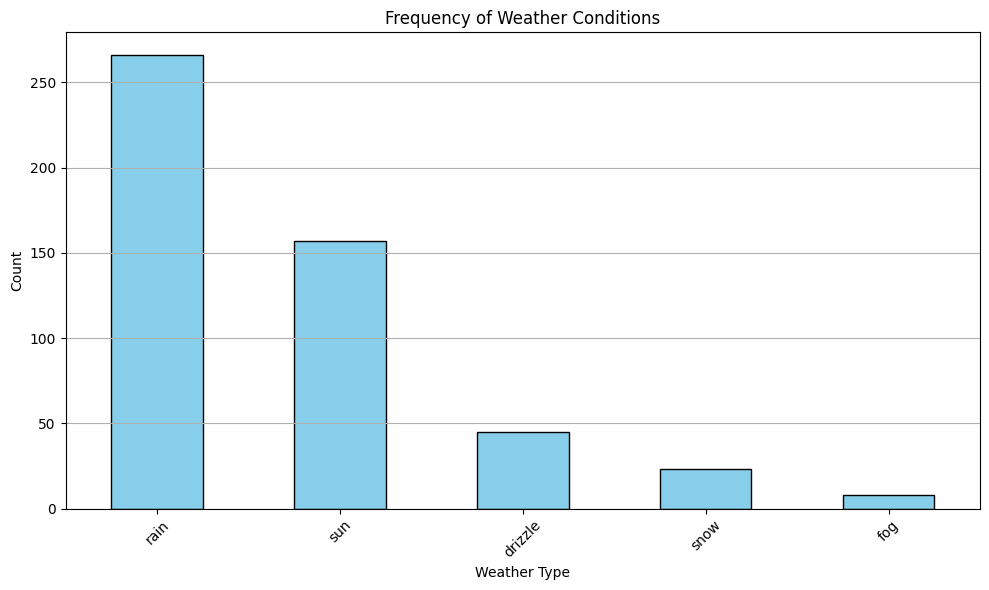

In [15]:
# 2. Create a bar chart of weather condition frequencies (drizzle, rain, etc.)

# Frequency of each weather condition
weather_counts = df['weather'].value_counts()

# Bar chart
plt.figure(figsize=(10, 6))
weather_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Weather Conditions')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. Propose how an automated weather station would detect and classify these conditions using sensors.

An automated weather station detects wind using an anemometer for speed and a wind vane for direction. It records wind data continuously to compute daily, weekly, and monthly averages and assess variance.

For precipitation, it uses a tipping bucket rain gauge to measure rainfall intensity and total amount. Optical or laser-based sensors classify precipitation types (rain, drizzle, snow) based on droplet size and fall speed. A visibility sensor detects fog, and temperature sensors help distinguish snow from rain. The station uses these readings to classify weather conditions automatically.

In [16]:
# Part 3: Analytical & Engineering Challenges

In [17]:
# 1. Calculate temperature range (max - min) daily and identify the top 10 most variable days.

#temperature range
df['temp_range'] = df['temp_max'] - df['temp_min']

# Top 10 most variable days
top_variable_days = df.sort_values(by='temp_range').tail(10)
print("Top 10 Most Variable Temperature Days:")
print(top_variable_days[['temp_max', 'temp_min', 'temp_range']])

Top 10 Most Variable Temperature Days:
            temp_max  temp_min  temp_range
date                                      
2012-09-13      27.8      11.7        16.1
2012-05-13      25.6       9.4        16.2
2012-08-17      32.8      16.1        16.7
2013-05-10      26.1       9.4        16.7
2013-05-05      28.9      11.7        17.2
2012-08-04      33.9      16.7        17.2
2012-05-12      24.4       6.7        17.7
2012-05-07      23.9       6.1        17.8
2013-05-06      30.6      12.2        18.4
2012-09-07      32.2      13.3        18.9


In [18]:
# 2. Identify correlations:
# • Between wind speed and precipitation
# • Between temperature and weather type

# Correlation
corr_wind_precip = df['wind'].corr(df['precipitation'])
print("Correlation between Wind Speed and Precipitation:", corr_wind_precip)

# Encode weather type as numeric
df['weather_encoded'] = df['weather'].astype('category').cat.codes

# Average temperature
df['temp_avg'] = (df['temp_max'] + df['temp_min']) / 2

# Correlation
corr_temp_weather = df['temp_avg'].corr(df['weather_encoded'])
print("Correlation between Avg Temp and Weather Type (encoded):", corr_temp_weather)

Correlation between Wind Speed and Precipitation: 0.257185361786352
Correlation between Avg Temp and Weather Type (encoded): 0.23488005768506928


In [19]:
# 3. Suggest how faulty readings (e.g., 0 wind on stormy day) could be detected automatically.

faulty_readings = df[((df['weather'] == "rain") | (df['weather'] == "drizzle")) & (df['precipitation'] == 0)]
faulty_readings

,precipitation,temp_max,temp_min,wind,weather,temp_range,weather_encoded,temp_avg
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,7.8,0,8.90
2012-01-07,0.0,7.2,2.8,2.3,rain,4.4,2,5.00
2012-01-23,0.0,8.3,1.1,3.6,rain,7.2,2,4.70
2012-01-27,0.0,6.7,-2.2,1.4,drizzle,8.9,0,2.25
2012-01-28,0.0,6.7,0.6,2.2,rain,6.1,2,3.65
...,...,...,...,...,...,...,...,...
2013-03-15,0.0,14.4,8.9,4.3,rain,5.5,2,11.65
2013-03-18,0.0,11.7,3.9,5.9,rain,7.8,2,7.80
2013-03-29,0.0,18.3,7.8,2.5,rain,10.5,2,13.05


In [20]:
# Part 4: Practical Implementation
#     1. Design a weather alert system using thresholds for:
#     • High wind + low temperature (storm warning)
#     • High precipitation + continuous rain days (flood warning)
#     2. Simulate or create pseudocode/flowchart for this system.

In [21]:
# Define thresholds
wind_threshold = 8  # km/h
temp_threshold = 5  # °C
precip_threshold = 20  # mm
rain_days_threshold = 3

# Function to check for storm warning
def storm_warning(wind, temp):
  return wind > wind_threshold and temp < temp_threshold

# Function to check for flood warning
def flood_warning(precip, consecutive_rain_days):
    return precip > precip_threshold and consecutive_rain_days >= rain_days_threshold

# Initialize consecutive rain days counter
consecutive_rain_days = 0

# Iterate through the DataFrame
for index, row in df.iterrows():
    # Check for storm warning
    if storm_warning(row['wind'], row['temp_min']):
        print(f"Storm Warning on {index.date()}: High wind ({row['wind']} km/h) and low temperature ({row['temp_min']} °C)")

    # Check for rain and update consecutive rain days counter
    if row['weather'] in ['rain', 'drizzle']:
        consecutive_rain_days +=1
    else:
        consecutive_rain_days = 0

    # Check for flood warning
    if flood_warning(row['precipitation'], consecutive_rain_days):
        print(f"Flood Warning on {index.date()}: High precipitation ({row['precipitation']} mm) and {consecutive_rain_days} consecutive rain days")


Flood Warning on 2012-01-04: High precipitation (20.3 mm) and 4 consecutive rain days
Storm Warning on 2012-01-21: High wind (8.2 km/h) and low temperature (3.3 °C)
Flood Warning on 2012-01-29: High precipitation (27.7 mm) and 9 consecutive rain days
Storm Warning on 2012-02-18: High wind (8.1 km/h) and low temperature (3.9 °C)
Flood Warning on 2012-03-29: High precipitation (27.4 mm) and 5 consecutive rain days
Flood Warning on 2012-10-30: High precipitation (34.5 mm) and 5 consecutive rain days
Flood Warning on 2012-11-19: High precipitation (54.1 mm) and 9 consecutive rain days
Flood Warning on 2012-11-23: High precipitation (32.0 mm) and 13 consecutive rain days
Flood Warning on 2012-11-30: High precipitation (35.6 mm) and 3 consecutive rain days
Storm Warning on 2012-12-17: High wind (9.5 km/h) and low temperature (1.7 °C)
Flood Warning on 2013-01-09: High precipitation (38.4 mm) and 7 consecutive rain days
Storm Warning on 2013-02-22: High wind (8.1 km/h) and low temperature (3.9

2. Simulate or create pseudocode/flowchart for this system.
FOR each day in weather data:

  IF wind > 8 AND avg_temp < 5:
      Issue "STORM WARNING"
  IF precipitation > 20 AND rain has occurred for last 3 days:
      Issue "FLOOD WARNING"



In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Shift the target variable (temp_max) to represent tomorrow's value
df['temp_max_tomorrow'] = df['temp_max'].shift(-1)

# Drop the last row since it has NaN after shifting
df = df.dropna()

# One-hot encode the categorical 'weather' column
df_encoded = pd.get_dummies(df, columns=['weather'], drop_first=True)

# Define feature columns (exclude date, current day's temp_max, and the target)
feature_cols = [col for col in df_encoded.columns if col not in ['date', 'temp_max', 'temp_max_tomorrow']]
X = df_encoded[feature_cols]
y = df_encoded['temp_max_tomorrow']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")

# Get the most recent day's data (last row in original df before shifting)
latest_day = df.iloc[[-1]].copy()

# One-hot encode and align with training features
latest_encoded = pd.get_dummies(latest_day, columns=['weather'], drop_first=True)

for col in feature_cols:
    if col not in latest_encoded.columns:
        latest_encoded[col] = 0  # Fill missing features with 0

# Remove unnecessary columns
latest_encoded = latest_encoded[feature_cols]  # Reuse the same columns used for training

# Predict tomorrow's max temperature
tomorrow_temp_pred = model.predict(latest_encoded)[0]
print(f"Predicted Max Temperature for 14-05-2013: {tomorrow_temp_pred:.2f}°C")

Predicted Max Temperature for 14-05-2013: 21.36°C
